
Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Assignment


In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]. Add rotation range and download dataset



In [3]:
import transforme

trainloader = transforme.trainloader
trainloader1 = transforme.trainloader1
testloader =  transforme.testloader
testloader1 = transforme.testloader1
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


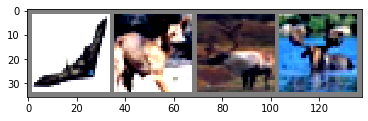

In [4]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [5]:
import resnet
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [8]:
import torch
from tqdm import tqdm
import traine
import teste
test_acc = []
train_acc = []
for epoch in range(50):  # loop over the dataset multiple times
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
print('Finished Training')

  0%|          | 0/782 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=1.6715108156204224 Batch_id=781 Accuracy=56.25: 100%|██████████| 782/782 [02:23<00:00,  4.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 46.54 %
lr=  0.1


Epoch= 1 Loss=1.4530084133148193 Batch_id=781 Accuracy=56.25: 100%|██████████| 782/782 [02:23<00:00,  4.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 55.19 %
lr=  0.1


Epoch= 2 Loss=1.2496362924575806 Batch_id=781 Accuracy=87.50: 100%|██████████| 782/782 [02:23<00:00,  4.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 63.91 %
lr=  0.1


Epoch= 3 Loss=0.575706422328949 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:24<00:00,  4.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 73.16 %
lr=  0.1


Epoch= 4 Loss=0.7403855323791504 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:24<00:00,  4.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75.68 %
lr=  0.1


Epoch= 5 Loss=0.44466882944107056 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:23<00:00,  4.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79.80 %
lr=  0.1


Epoch= 6 Loss=0.6114075779914856 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.16 %
lr=  0.1


Epoch= 7 Loss=0.7830497622489929 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:24<00:00,  4.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.91 %
lr=  0.1


Epoch= 8 Loss=0.594009280204773 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:23<00:00,  4.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82.63 %
lr=  0.1


Epoch= 9 Loss=0.4218880534172058 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.37 %
lr=  0.1


Epoch= 10 Loss=0.11965528130531311 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.47 %
lr=  0.1


Epoch= 11 Loss=0.5082166194915771 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:24<00:00,  4.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.56 %
lr=  0.1


Epoch= 12 Loss=0.1370954066514969 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:23<00:00,  4.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.43 %
lr=  0.1


Epoch= 13 Loss=0.41741806268692017 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.86 %
lr=  0.1


Epoch= 14 Loss=0.15080079436302185 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.92 %
lr=  0.1


Epoch= 15 Loss=0.267741322517395 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.36 %
lr=  0.1


Epoch= 16 Loss=0.3171599507331848 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.13 %
lr=  0.1


Epoch= 17 Loss=0.33785295486450195 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.37 %
lr=  0.1


Epoch= 18 Loss=0.24401339888572693 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:23<00:00,  4.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.30 %
lr=  0.1


Epoch= 19 Loss=0.62187659740448 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.38 %
lr=  0.05


Epoch= 20 Loss=0.2319546788930893 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:24<00:00,  4.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.64 %
lr=  0.05


Epoch= 21 Loss=0.19416816532611847 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.32 %
lr=  0.05


Epoch= 22 Loss=0.1269265115261078 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.46 %
lr=  0.05


Epoch= 23 Loss=0.24856656789779663 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.37 %
lr=  0.05


Epoch= 24 Loss=0.02047613263130188 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.55 %
lr=  0.05


Epoch= 25 Loss=0.0047792792320251465 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.37 %
lr=  0.05


Epoch= 26 Loss=0.2833975553512573 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.99 %
lr=  0.05


Epoch= 27 Loss=0.09351791441440582 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.49 %
lr=  0.05


Epoch= 28 Loss=0.223777174949646 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.66 %
lr=  0.05


Epoch= 29 Loss=0.2625085413455963 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:24<00:00,  4.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.44 %
lr=  0.025


Epoch= 30 Loss=0.11342987418174744 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.88 %
lr=  0.025


Epoch= 31 Loss=0.004341483116149902 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.23 %
lr=  0.025


Epoch= 32 Loss=0.0031528472900390625 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:23<00:00,  4.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.26 %
lr=  0.025


Epoch= 33 Loss=0.20069456100463867 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.38 %
lr=  0.025


Epoch= 34 Loss=0.006488591432571411 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.30 %
lr=  0.025


Epoch= 35 Loss=0.019480884075164795 Batch_id=781 Accuracy=93.75: 100%|██████████| 782/782 [02:24<00:00,  4.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.22 %
lr=  0.025


Epoch= 36 Loss=0.022448301315307617 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:23<00:00,  4.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.29 %
lr=  0.025


Epoch= 37 Loss=0.13334661722183228 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.20 %
lr=  0.025


Epoch= 38 Loss=0.0011019706726074219 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.24 %
lr=  0.025


Epoch= 39 Loss=0.045174241065979004 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.88 %
lr=  0.0125


Epoch= 40 Loss=0.00219881534576416 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.03 %
lr=  0.0125


Epoch= 41 Loss=0.0015162825584411621 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:23<00:00,  4.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.96 %
lr=  0.0125


Epoch= 42 Loss=0.0004475712776184082 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.26 %
lr=  0.0125


Epoch= 43 Loss=0.0019756853580474854 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.06 %
lr=  0.0125


Epoch= 44 Loss=0.05775311589241028 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.06 %
lr=  0.0125


Epoch= 45 Loss=0.0012090802192687988 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.21 %
lr=  0.0125


Epoch= 46 Loss=0.009916424751281738 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.25 %
lr=  0.0125


Epoch= 47 Loss=0.026283830404281616 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:24<00:00,  4.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.09 %
lr=  0.0125


Epoch= 48 Loss=0.008018642663955688 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:23<00:00,  4.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.11 %
lr=  0.0125


Epoch= 49 Loss=0.005009949207305908 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:23<00:00,  4.48it/s]
100%|██████████| 157/157 [00:06<00:00, 23.90it/s]

Accuracy of the network on the 10000 test images: 90.16 %
Finished Training


Text(0, 0.5, 'Accuracy')

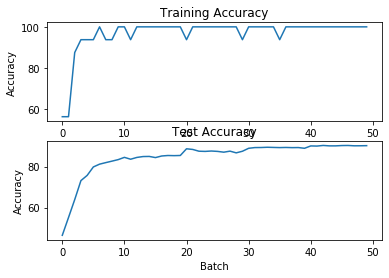

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   frog  frog   dog plane


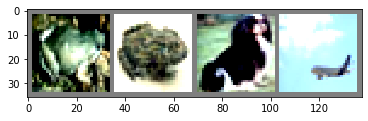

In [10]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog  frog   dog plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [13]:
teste.test_categorywise(net, device, testloader, classes)

100%|██████████| 157/157 [00:06<00:00, 20.84it/s]

Accuracy of plane : 93.85 %
Accuracy of   car : 98.36 %
Accuracy of  bird : 88.14 %
Accuracy of   cat : 80.56 %
Accuracy of  deer : 84.91 %
Accuracy of   dog : 80.30 %
Accuracy of  frog : 93.44 %
Accuracy of horse : 89.47 %
Accuracy of  ship : 95.71 %
Accuracy of truck : 97.78 %
